# Data Creation

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
import cv2

In [ ]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


(27455, 28, 28, 1)
(7172, 784)


Text(0.5, 1.0, 'Frequency of each label')

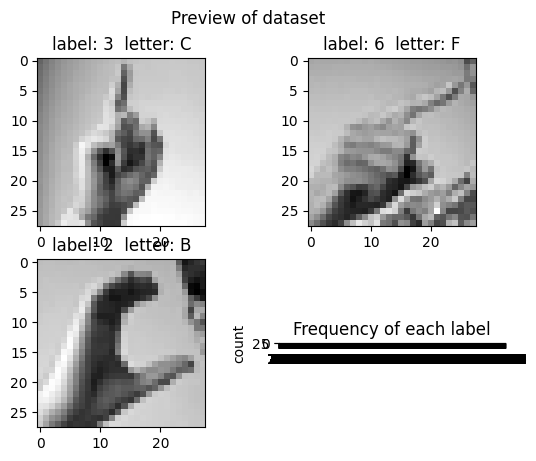

In [23]:
train_label=train_data['label']
train_label.head()
trainset=train_data.drop(['label'],axis=1)
trainset.head()

X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

test_label=test_data['label']
X_test=test_data.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)
X_test=X_test.values.reshape(-1,28,28,1)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

sns.countplot(train_label)
plt.title("Frequency of each label")

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

(ls,acc)=model.evaluate(x=X_test,y=y_test)

print('MODEL ACCURACY = {}%'.format(acc*100))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

In [25]:
# Load dataset
training_dataset = pd.read_csv('sign_mnist_train.csv')
testing_dataset = pd.read_csv('sign_mnist_test.csv')

# Dataset Information
training_dataset.info()
testing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [26]:
# Preparing training data
training_labels = training_dataset['label']
training_features = training_dataset.drop(['label'], axis=1)
reshaped_training_features = training_features.values.reshape(-1, 28, 28, 1)

# Preparing testing data
testing_labels = testing_dataset['label']
testing_features = testing_dataset.drop(['label'], axis=1)
reshaped_testing_features = testing_features.values.reshape(-1, 28, 28, 1)


In [27]:
# Label Binarization
label_converter = LabelBinarizer()
binarized_training_labels = label_converter.fit_transform(training_labels)
binarized_testing_labels = label_converter.transform(testing_labels)


In [28]:
# Normalize testing data
normalized_testing_features = reshaped_testing_features / 255

In [29]:
# Data Augmentation
augmentation_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range=0,
                                            height_shift_range=0.2,
                                            width_shift_range=0.2,
                                            shear_range=0,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode='nearest')


Text(0.5, 1.0, 'label: 13  letter: M')

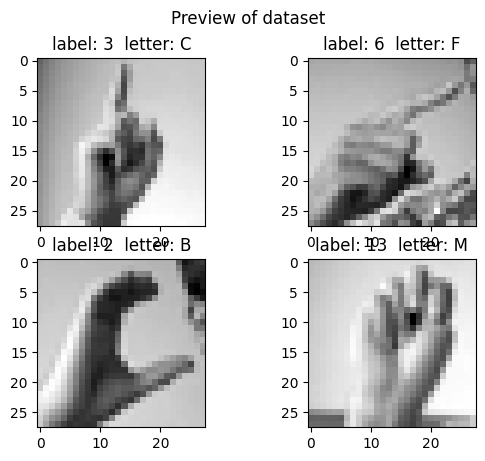

In [30]:
# Preview dataset
figure, axes = plt.subplots(2, 2)
figure.suptitle('Preview of dataset')
axes[0, 0].imshow(reshaped_training_features[0].reshape(28, 28), cmap='gray')
axes[0, 0].set_title('label: 3  letter: C')
axes[0, 1].imshow(reshaped_training_features[1].reshape(28, 28), cmap='gray')
axes[0, 1].set_title('label: 6  letter: F')
axes[1, 0].imshow(reshaped_training_features[2].reshape(28, 28), cmap='gray')
axes[1, 0].set_title('label: 2  letter: B')
axes[1, 1].imshow(reshaped_training_features[4].reshape(28, 28), cmap='gray')
axes[1, 1].set_title('label: 13  letter: M')


Text(0.5, 1.0, 'Frequency of each label')

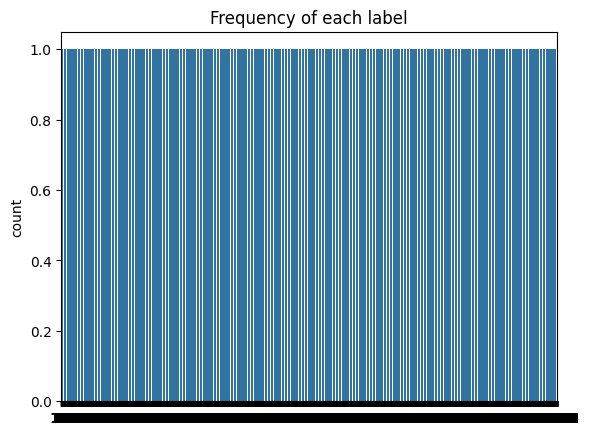

In [31]:
# Label frequency plot
sns.countplot(training_labels)
plt.title("Frequency of each label")

In [32]:
# Building the model

sign_language_model = Sequential()
sign_language_model.add(Conv2D(128, kernel_size=(5, 5), strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
sign_language_model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
sign_language_model.add(Conv2D(64, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
sign_language_model.add(MaxPool2D((2, 2), 2, padding='same'))
sign_language_model.add(Conv2D(32, kernel_size=(2, 2), strides=1, activation='relu', padding='same'))
sign_language_model.add(MaxPool2D((2, 2), 2, padding='same'))
sign_language_model.add(Flatten())
sign_language_model.add(Dense(units=512, activation='relu'))
sign_language_model.add(Dropout(rate=0.25))
sign_language_model.add(Dense(units=24, activation='softmax'))
sign_language_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)         

In [33]:
# Compiling the model
sign_language_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
sign_language_model.fit(augmentation_generator.flow(reshaped_training_features, binarized_training_labels, batch_size=200),
                        epochs=35,
                        validation_data=(normalized_testing_features, binarized_testing_labels),
                        shuffle=1)

Epoch 1/35
138/138 [==============================] - 121s 860ms/step - loss: 2.9808 - accuracy: 0.1068 - val_loss: 2.3007 - val_accuracy: 0.3040
Epoch 2/35
138/138 [==============================] - 111s 804ms/step - loss: 2.2323 - accuracy: 0.2932 - val_loss: 1.4801 - val_accuracy: 0.5282
Epoch 3/35
138/138 [==============================] - 111s 802ms/step - loss: 1.6410 - accuracy: 0.4618 - val_loss: 1.1504 - val_accuracy: 0.6026
Epoch 4/35
138/138 [==============================] - 110s 797ms/step - loss: 1.2644 - accuracy: 0.5760 - val_loss: 0.7980 - val_accuracy: 0.7361
Epoch 5/35
138/138 [==============================] - 111s 807ms/step - loss: 1.0736 - accuracy: 0.6380 - val_loss: 0.7339 - val_accuracy: 0.7447
Epoch 6/35
138/138 [==============================] - 113s 811ms/step - loss: 0.9056 - accuracy: 0.6933 - val_loss: 0.5409 - val_accuracy: 0.8015
Epoch 7/35
138/138 [==============================] - 113s 819ms/step - loss: 0.7846 - accuracy: 0.7361 - val_loss: 0.4851 -

In [34]:
# Evaluate the model
loss_score, accuracy_score = sign_language_model.evaluate(x=normalized_testing_features, y=binarized_testing_labels)
print(f'MODEL ACCURACY = {accuracy_score * 100}%')

225/225 [==============================] - 6s 27ms/step - loss: 0.0227 - accuracy: 0.9930
MODEL ACCURACY = 99.3028461933136%
